# **Welcome to the tutorial 6**

## Data Preparation
* Numpy array
* Pandas Dataframe
* Scipy for Statistics
*Sklearn for Machine Learning

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns

In [2]:
#download the data
#!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

## Preprocessing

Doing Min Max Scaling

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width','target'])

In [4]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# First impressions

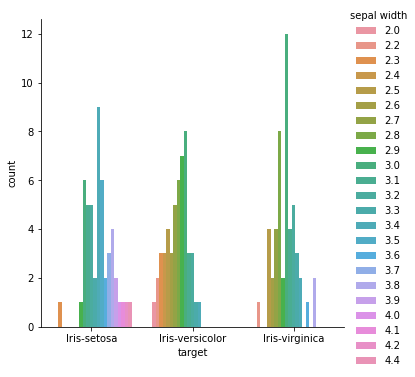

In [5]:
sns.catplot(data=df, x='target', kind="count", hue='sepal width');

## Seperating

In [6]:
# seperating out features 
x_raw = df[features].values

# seperating out target
y_raw = df[["target"]].values

In [7]:
# standardizing the features
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

x = MinMaxScaler().fit_transform(x_raw)

le = LabelEncoder()
y = le.fit_transform(y_raw)
label_list = list(le.classes_)          # have to use le, cant use LabelEncoder().classes_ for some reason
print(label_list)


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


C:\Users\kkaus\anaconda3\envs\comp4331\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Split training and testing

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#### Warm up: an example for KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

fiveNN = KNeighborsClassifier(n_neighbors=5)
fiveNN.fit(x_train, y_train)

# New way 
print("Acccuracy for testing", fiveNN.score(x_test,y_test))

# Old way 
# y_pred = fiveNN.predict(x)
# acc = sum(y_pred == y) / len(y)
# print(acc)

Acccuracy for testing 0.96


####  take into account its distance from its neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=5,weights='distance')
neigh.fit(x_train,y_train)

print('accuracy for testing',neigh.score(x_test,y_test))

accuracy for testing 0.96


## How to tune k by cross-validation 

In [52]:
from sklearn.model_selection import cross_val_score

KNN = KNeighborsClassifier()
scores = cross_val_score(KNN, x_train, y_train, cv= 10)
print(scores)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
best_k = 1
best_score = 0
for k in range(2,50):
    KNN = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(KNN, x_train, y_train, cv=10))
    if score > best_score:
        best_score = score
        best_k = k

print('The best k is', best_k)
print('The best score is', best_score)



[0.9 0.9 1.  1.  1.  1.  1.  0.8 1.  0.9]
The best k is 12
The best score is 0.9700000000000001


#### Robustness under different n_neighbors

In [57]:
name_list = ['small', 'medium', 'large']
k_size = [2,6,60]

for ind, name in enumerate(name_list):
    KNN = KNeighborsClassifier(n_neighbors=k_size[ind])
    KNN.fit(x_train, y_train)

    print('accuracy for testing with ' + name + 'n_neighbords in normal dataset:', KNN.score(x_test, y_test))

noise_exp_nums = 23

noise_x = np.random.uniform(low=0.0, high=1.0, size=[noise_exp_nums,x_train.shape[1]])
noise_x = np.concatenate([x_train,noise_x],axis = 0)
noise_y = np.random.randint(low=0, high=2, size=[noise_exp_nums])
noise_y = np.concatenate([y_train,noise_y],axis = 0)


for ind, name in enumerate(name_list):
    KKN = KNeighborsClassifier(n_neighbors=k_size[ind])
    KNN.fit(noise_x, noise_y)

    print('accuracy for testing with ' + name + 'n_neighbors in noise dataset:', KNN.score(x_test, y_test))

accuracy for testing with smalln_neighbords in normal dataset: 0.94
accuracy for testing with mediumn_neighbords in normal dataset: 0.96
accuracy for testing with largen_neighbords in normal dataset: 0.9
accuracy for testing with smalln_neighbors in noise dataset: 0.88
accuracy for testing with mediumn_neighbors in noise dataset: 0.88
accuracy for testing with largen_neighbors in noise dataset: 0.88


#### Making our own KNN